局部支撑函数（或称局部基函数）是指在每个单元上定义的基函数，它的值在该单元之外为零。通常用于构造有限元解的函数空间。

假设我们考虑一维问题（例如，区间 [𝑎,𝑏] 被划分为多个子区间），局部支撑函数可以用线性基函数来表示。最常见的基函数是分段线性函数，如 Lagrange 基函数，它在某个节点处取值为 1，而在其他节点处取值为 0。

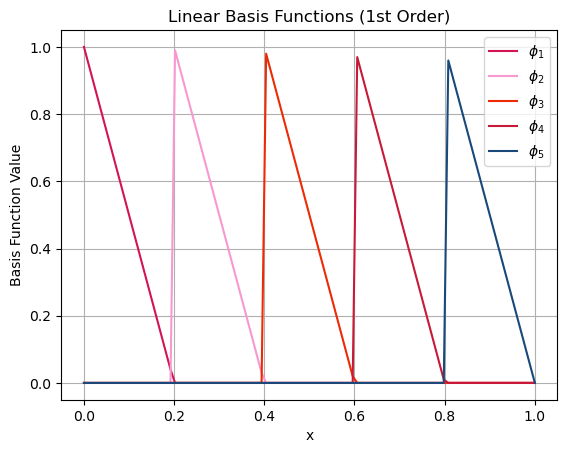

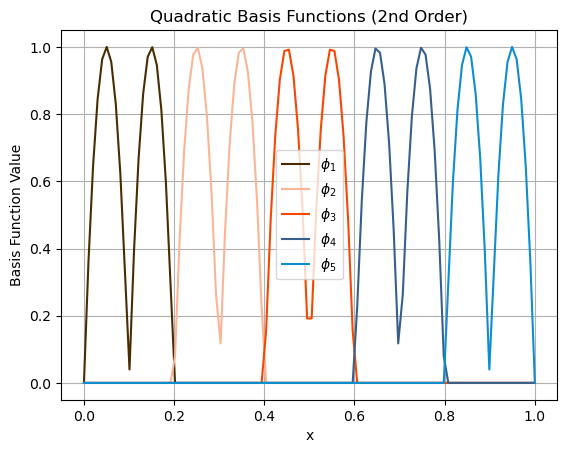

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 定义均匀分布的有限元网格节点（5个网格）
elements = 5
nodes = np.linspace(0, 1, elements + 1)

# 绘制一阶线性有限元支撑函数
def plot_linear_basis():
    x = np.linspace(0, 1, 100)
    plt.figure()
    for i in range(elements):
        # 对每个单元定义支撑函数
        phi = np.zeros_like(x)
        left_node = nodes[i]
        right_node = nodes[i + 1]
        
        # 定义支撑函数的区域
        phi = np.where((x >= left_node) & (x <= right_node), (right_node - x) / (right_node - left_node), 0)
        plt.plot(x, phi, label=f'$\phi_{i+1}$', linestyle='-', color=np.random.rand(3,))
    
    plt.title('Linear Basis Functions (1st Order)')
    plt.xlabel('x')
    plt.ylabel('Basis Function Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# 绘制二阶二次有限元支撑函数
def plot_quadratic_basis():
    x = np.linspace(0, 1, 100)
    plt.figure()
    for i in range(elements):
        # 对每个单元定义二次支撑函数
        phi = np.zeros_like(x)
        left_node = nodes[i]
        mid_node = (nodes[i] + nodes[i + 1]) / 2
        right_node = nodes[i + 1]
        
        # 定义支撑函数的区域（左端至中间）
        phi += np.where((x >= left_node) & (x <= mid_node), 4 * (x - left_node) * (mid_node - x) / (mid_node - left_node)**2, 0)
        
        # 定义支撑函数的区域（中间至右端）
        phi += np.where((x > mid_node) & (x <= right_node), 4 * (x - mid_node) * (right_node - x) / (right_node - mid_node)**2, 0)
        plt.plot(x, phi, label=f'$\phi_{i+1}$', linestyle='-', color=np.random.rand(3,))
    
    plt.title('Quadratic Basis Functions (2nd Order)')
    plt.xlabel('x')
    plt.ylabel('Basis Function Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# 调用这些函数来绘制每阶支撑函数
plot_linear_basis()
plot_quadratic_basis()


## 示例：泊松方程

### 理论推导

$$-\frac{d^2u}{dx^2}=f(x)$$

给定$f(x)=-1$，且采用 Dirichlet 边界$u(0)=0,u(1)=0$
此时，精确解为 $u(x) = \frac{1}{2}x^2 - \frac{1}{2}x$

选取试探函数$\phi_i(x)$，可得方程弱解形式

$$\int_0^1-\frac{d^2u}{dx^2}\phi_i(x)dx = \int_0^1f(x)\phi_i(x)dx$$

对方程左边采用分部积分得到

$$
    \int_0^1\frac{d^2u}{dx^2}\phi_i(x)dx = \left[ \frac{du}{dx}\phi_i(x) \right]_0^1 - \int_0^1\frac{du}{dx}\frac{d\phi_i}{dx}dx
$$

由于边界条件为 Dirichlet 边界，因此边界项为 0，得到原方程的弱解形式

$$
    \int_0^1\frac{du}{dx}\frac{d\phi_i}{dx}dx = \int_0^1f(x)\phi_i(x)dx
$$

选取基函数于试探函数相同$\phi_i(x)$，可得

$$
    u(x)\approx \sum_{i=1}^n u_i\phi_i(x)
$$

其中$u_i$是未知系数
代入得

$$
    \sum_{i=1}^n u_i\int_0^1\frac{d\phi_i}{dx}\frac{d\phi_j}{dx}dx = \int_0^1f(x)\phi_j(x)dx
$$

令：

$$
K_{ij} = \int_0^1\frac{d\phi_i}{dx}\frac{d\phi_j}{dx}dx \\
F_j = \int_0^1f(x)\phi_j(x)dx
$$

则上式简化为

$$Ku=F$$

### 具体示例

在计算域[0,1]上均匀划分 3 个网格，网格大小$h=1/2=0.5$

基函数选取为：

$$
\phi_1(x) = 1 - \frac{x}{h} \\
\phi_2(x) = \frac{x}{h}
$$

将原方程的弱解形式代入到每个单元中

$$
\sum_{i=1}^n u_i\int_{kh}^{(k+1)h}\frac{d\phi_i}{dx}\frac{d\phi_j}{dx}dx = \int_{kh}^{(k+1)h}f(x)\phi_j(x)dx
$$

这里 i 是基函数，j 是试探函数

$$
    \begin{bmatrix}
    \int_{kh}^{(k+1)h}\frac{d\phi_1}{dx}\frac{d\phi_1}{dx}dx, \int_{kh}^{(k+1)h}\frac{d\phi_2}{dx}\frac{d\phi_1}{dx}dx \\
    \int_{kh}^{(k+1)h}\frac{d\phi_1}{dx}\frac{d\phi_2}{dx}dx, \int_{kh}^{(k+1)h}\frac{d\phi_2}{dx}\frac{d\phi_2}{dx}dx
    \end{bmatrix}
    \begin{bmatrix}
    u_1 \\
    u_2
    \end{bmatrix}
    =
    \begin{bmatrix}
    \int_{kh}^{(k+1)h}f(x)\phi_1(x)dx \\
    \int_{kh}^{(k+1)h}f(x)\phi_2(x)dx
    \end{bmatrix}
$$

这里

$$
\frac{d\phi_1}{dx} = -\frac{1}{h},\ \frac{d\phi_2}{dx} = \frac{1}{h}
$$

$$f(x)=-2$$

获得单元刚度矩阵$K_{local}$和装配向量$F_{local}$

$$
    K_{local} =
    \begin{bmatrix}
        \int_{kh}^{(k+1)h}\frac{d\phi_1}{dx}\frac{d\phi_1}{dx}dx, \int_{kh}^{(k+1)h}\frac{d\phi_2}{dx}\frac{d\phi_1}{dx}dx \\
        \int_{kh}^{(k+1)h}\frac{d\phi_1}{dx}\frac{d\phi_2}{dx}dx, \int_{kh}^{(k+1)h}\frac{d\phi_2}{dx}\frac{d\phi_2}{dx}dx
    \end{bmatrix}
    =
    \frac{1}{h}
    \begin{bmatrix}
        1, -1 \\
        -1, 1
    \end{bmatrix}
    = 
    \begin{bmatrix}
        2, -2 \\
        -2, 2
    \end{bmatrix}
$$

$$
    F_{local}=
    \begin{bmatrix}
    \int_{kh}^{(k+1)h}f(x)\phi_1(x)dx \\
    \int_{kh}^{(k+1)h}f(x)\phi_2(x)dx
    \end{bmatrix}
    =
    -2\cdot \frac{h}{2}
    \begin{bmatrix}
    1 \\
    1
    \end{bmatrix}
    =
    \begin{bmatrix}
    -0.5 \\
    -0.5
\end{bmatrix}
$$

组装全局刚度矩阵和装备向量
将所有单元刚度矩阵和专配向量按节点所在位置叠加即可

$$
K= 
\begin{bmatrix}
2, -2, 0 \\
-2, 4, -2 \\
0, 2, -2
\end{bmatrix}
$$

$$
F=
\begin{bmatrix}
-0.5 \\
-1.0 \\
-0.5
\end{bmatrix}
$$

应用边界条件，即$u(0)=0,u(1)=0$，需要从全局矩阵中移除对应的固定节点的行和列

$$K=[4],F=[-1.0]$$

求解得到线性方程组的解

$$u=[-0.25]$$

填充边界条件后

$$
u=
\begin{bmatrix}
0 \\
-0.25 \\
0
\end{bmatrix}
$$

K = 
 [[ 2. -2.  0.]
 [-2.  4. -2.]
 [ 0. -2.  2.]]
F = [-0.25 -0.5  -0.25]


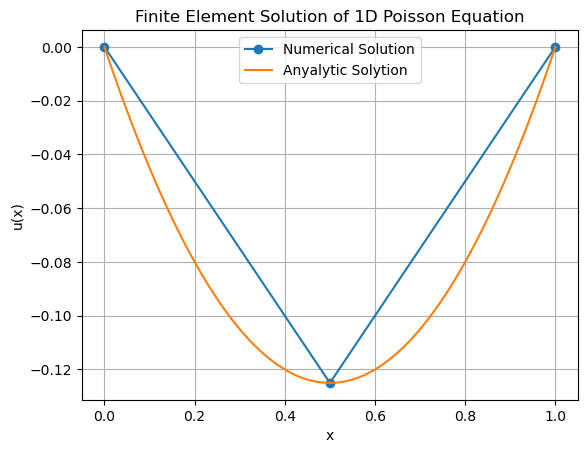

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 定义问题参数
n_nodes = 3  # 节点数
element_indices = []
for i in range(n_nodes-1):
    element_indices.append((i, i))
length = 1.0  # 定义域长度
f_value = -1  # 源项常数

# 划分网格
h = length / (n_nodes - 1)
node_coords = np.linspace(0, 1, n_nodes)

# 初始化刚度矩阵和载荷向量
K = np.zeros((n_nodes, n_nodes))
F = np.zeros(n_nodes)

# 构建刚度矩阵和载荷向量
for (i, j) in element_indices:
    k_local = np.array([[1, -1], [-1, 1]]) * (1 / h)
    f_local = np.array([f_value * h / 2, f_value * h / 2])
    K[i:i+2, j:j+2] += k_local
    F[i:i+2] += f_local

print("K = \n", K)
print("F =", F)

# 应用边界条件
K = K[1:-1, 1:-1]
F = F[1:-1]

# 求解线性系统
u = np.linalg.solve(K, F)

# 填充边界条件
u = np.hstack([0, u, 0])

# 绘制结果
x = np.linspace(0, 1, 100)
u_analytic = 0.5*x**2 - 0.5*x
plt.plot(node_coords, u, '-o', label='Numerical Solution')
plt.plot(x, u_analytic, label="Anyalytic Solytion")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Finite Element Solution of 1D Poisson Equation')
plt.legend()
plt.grid(True)
plt.show()